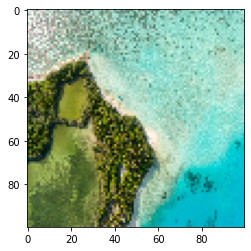

In [2]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
from scipy.spatial.distance import pdist, cdist
import imageio

def make_spatial_information(img_shape):
    A = np.zeros((img_shape[0],img_shape[1]))
    B = np.array([np.array(x) for (x,y) in np.ndenumerate(A)])
    C = pdist(B, 'sqeuclidean')
    return C

def make_color_information(img):
    A = img
    B = A.reshape(img.shape[0]*img.shape[1],3)
    C = pdist(B, 'sqeuclidean')
    return C

def make_symmetric_matrix(lower_list, width):
    n = width
    M = np.zeros((n,n)) # Initialize nxn matrix
    triu = np.triu_indices(n, 1) # Find upper right indices of a triangular nxn matrix
    tril = np.tril_indices(n, -1) # Find lower left indices of a triangular nxn matrix
    M[triu] = lower_list # Assign list values to upper right matrix
    M[tril] = M.T[tril] # Make the matrix symmetric
    return M

imageNum = 
img = mpimg.imread('image'+str(imageNum)+'.png') 
plt.imshow(img)

In [3]:
Ys, Yc = 0.0001, 1
SI, CI = make_spatial_information(img.shape), make_color_information(img)
K_L = np.exp(-Ys*SI)*np.exp(-Yc*CI)
dpts_num = img.shape[0]*img.shape[1]
K = make_symmetric_matrix(K_L, dpts_num)
plt.gray()

<Figure size 432x288 with 0 Axes>

In [4]:
def makeKNeiborsGraph(K, k_):
    k = k_ 
    KN = np.array(K)
    for i in range(10000):
        kSmallestEdgesIdx = np.argpartition(KN[i], k)
        KN[i][kSmallestEdgesIdx[:k]] = 1
        KN[i][kSmallestEdgesIdx[k:]] = 0
        KN[i][i] = 0
    return KN
KNNG = makeKNeiborsGraph(K, 6)

In [5]:
def createGraghLaplacian(K_):
    K = np.array(K_)
    D = np.diag(K.sum(axis=1))
    for i in range(10000):
        D[i][i] = D[i][i]**(-1/2)
    GL = D - K
    # return normalized one
    return D @ GL @ D
GL = createGraghLaplacian(K)

In [6]:
vals, vecs = np.linalg.eig(GL)

In [7]:
vecs = vecs[:,np.argsort(vals)]
# vals = vals[np.argsort(vals)] 

In [14]:
# 2 cluster code
def clusterByVecs(vecs_):
    vecs = np.array(vecs_)
    clusters = np.zeros(10000)
    for i in range(10000):
        if vecs[i][9999] < 0:
            clusters[i] = 1
#     for i in range(10000):
#         if clusters[i]==0:
#             if vecs[i][9995] > 0:
#                 clusters[i] = 1
#         if clusters[i]==2:
#             if vecs[i][9995] > 0:
#                 clusters[i] = 3
    return clusters
def clusterByRandom():
    return np.random.randint(range_, size=num)

# clusters = clusterByRand(4,10000)
# clusters = clusterByVecs(vecs)
clusters = clusterByVecs(vecs)

U = np.array(vecs)
numEigen = 50
U = U[...,:numEigen].T

def ThreeMeansClutsering(vecs, clusters):
    M = np.array(vecs).T
    Cluster_Label = np.array(clusters)
    for i in range(10):
        Indices_Clus_1 = np.argwhere(Cluster_Label==0)
        Indices_Clus_2 = np.argwhere(Cluster_Label==1)
#         Indices_Clus_3 = np.argwhere(Cluster_Label==2)
#         Indices_Clus_4 = np.argwhere(Cluster_Label==3)
        Mean_Clus_1 = np.mean(M[Indices_Clus_1], axis=0)
        Mean_Clus_2 = np.mean(M[Indices_Clus_2], axis=0)
#         Mean_Clus_3 = np.mean(M[Indices_Clus_3], axis=0)
#         Mean_Clus_4 = np.mean(M[Indices_Clus_4], axis=0)
        Dists_To_Mean_1 = cdist(Mean_Clus_1, M, 'sqeuclidean')
        Dists_To_Mean_2 = cdist(Mean_Clus_2, M, 'sqeuclidean')
#         Dists_To_Mean_3 = cdist(Mean_Clus_3, M, 'sqeuclidean')
#         Dists_To_Mean_4 = cdist(Mean_Clus_4, M, 'sqeuclidean')
#         tmp = np.concatenate([Dists_To_Mean_1, Dists_To_Mean_2, Dists_To_Mean_3, Dists_To_Mean_4])
        tmp = np.concatenate([Dists_To_Mean_1, Dists_To_Mean_2])
        Cluster_Label = np.argmin(tmp,axis=0)
        plt.imsave("./output/GifSrcs/normalized/2clusters_image"+str(imageNum)+"/im"+str(i)+".png", (Cluster_Label*255).reshape(100,100))
ThreeMeansClutsering(U, clusters)
gifSrcList = []
for i in range(10):
    gifSrcList.append("./output/GifSrcs/normalized/2clusters_image"+str(imageNum)+"/im"+str(i)+".png")
images = []
for filename in gifSrcList:
    images.append(imageio.imread(filename))
imageio.mimsave('./output/GIFs/normalized/2clusters_image'+str(imageNum)+'.gif', images)

NameError: name 'clusterByRand' is not defined

In [10]:
print(imageNum)

1
